In [ ]:
!python3 --version

Python 3.7.13


# Google Colab Link: - https://colab.research.google.com/drive/1a72scBYVYVRcIVkUnf739N3qWmHmsoJI?usp=sharing

# **Amazon Food Review**

In [2]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 4.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=e14b329a575c1713955dfe2792c203893bbfbe541dcb7c809a212b13329b1da2
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [49]:
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import string
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.naive_bayes import BernoulliNB 
from sklearn.svm import SVC
import gensim
from gensim import corpora, models
import pyLDAvis.gensim_models
import pyLDAvis.sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import seaborn as sns
from collections import Counter
from nltk import ngrams
import glob
from google.colab import files
import spacy
!python -m spacy download en_core_web_smnlp = spacy.load('en_core_web_sm')
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout, SpatialDropout1D
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import GridSearchCV
from keras.layers import SimpleRNN, Activation, Dense, Dropout, Input, Embedding, LSTM
from keras.models import Model
import tensorflow as tf
import keras

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/bin/bash: -c: line 0: syntax error near unexpected token `'en_core_web_sm''
/bin/bash: -c: line 0: `python -m spacy download en_core_web_smnlp = spacy.load('en_core_web_sm')'


In [4]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
 
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
link = "https://drive.google.com/file/d/1WgAldRbXCaChD5sqND9P2OFJz1h98kQ4/view?usp=sharing"
# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('test.csv')

df_test = pd.read_csv('test.csv')

In [6]:
link = "https://drive.google.com/file/d/11whLiZpbfbuUavBZjfWDNJnaXDGGxA1U/view?usp=sharing"
# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('train.csv')

df_train = pd.read_csv('train.csv')

In [ ]:
df_test

,Review_text
0,This is a good tasting K-cup from a guy who dr...
1,these are a wonderful light crunchy breadstick...
2,Love this product! And has anyone mentioned th...
3,I just bought this and have used it around the...
4,great product. actually we've used it all now...
...,...
142109,This is a fantastic product. I'm relatively n...
142110,I trust this brand--the flavors are blended ju...
142111,"This pepper is great! I was buying McCormick, ..."
142112,I have relied on Canidae for my 4 dogs for ove...


In [ ]:
df_train

,Score,Review_text
0,5,I received this product early from the seller!...
1,5,*****<br />Numi's Collection Assortment Melang...
2,5,"I was very careful not to overcook this pasta,..."
3,5,Buying this multi-pack I was misled by the pic...
4,5,These bars are so good! I loved them warmed up...
...,...,...
426335,5,"I had been buying at a store, but they had a h..."
426336,5,So glad that there are companies that are maki...
426337,4,"I love real Scottish haggis and this brand, th..."
426338,5,We eat a lot of syrup in our house. My three ...


## **Bar Chart Visualization**

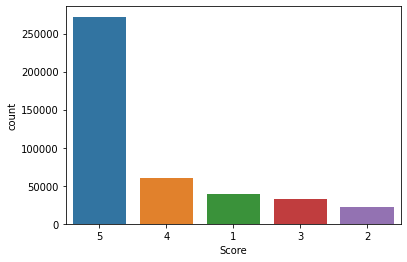

In [ ]:
# Bar chart of analysis of the texts based on the sentiments
sns.countplot(data=df_train, x='Score',order=df_train['Score'].value_counts().index)

After plotting out a bar chart based on the count of the scores, the initial analysis of the dataset shows that most of the scores are rated 5 which means the dataset has a high number of positive reviews. Then we have the order of 4, 1, 3, 2 from highest to lowest respectively. The negative reviews that are provided in the dataset is relatively lesser.

## **Cleaning of Text**

In [7]:
# Function to clean the texts in the dataframe
def clean (text):
    text = re.sub(r'@[A-Za-z0-9]+','',text) #Remove tags of username and etc, starting with @
    text = re.sub(r'#','',text) # Removing #'s from the texts
    text = re.sub(r'https?:/\/\S+','',text, flags=re.MULTILINE) # removing links from the texts
    text = text.replace('\n', '') # removing unwanted \n escape sequences from the texts
    text = re.sub('<.*?>', '', text)
    text = re.sub('[!"$%&\'()*+,-./:@;<=>?[\\]^_`{|}~]', '', text) # removing punctuations from the texts
    text = text.lower()
    return text

df_train['Clean_Text'] = df_train['Review_text'].apply(clean)

Before we normalize the text, we go ahead and clean the given text given. This process is done using regex by removing the tags, the possible hyperlinks in the text, unwanted html tags that are present in the text, punctuations and finally making all the characters into lower case. Cleaning of texts are important as it helps in giving out a good analysis for our text and make the machine learning models give more accurate outputs.

In [ ]:
df_train

,Score,Review_text,Clean_Text
0,5,I received this product early from the seller!...,i received this product early from the seller ...
1,5,*****<br />Numi's Collection Assortment Melang...,numis collection assortment melange includes5 ...
2,5,"I was very careful not to overcook this pasta,...",i was very careful not to overcook this pasta ...
3,5,Buying this multi-pack I was misled by the pic...,buying this multipack i was misled by the pict...
4,5,These bars are so good! I loved them warmed up...,these bars are so good i loved them warmed up ...
...,...,...,...
426335,5,"I had been buying at a store, but they had a h...",i had been buying at a store but they had a ha...
426336,5,So glad that there are companies that are maki...,so glad that there are companies that are maki...
426337,4,"I love real Scottish haggis and this brand, th...",i love real scottish haggis and this brand tho...
426338,5,We eat a lot of syrup in our house. My three ...,we eat a lot of syrup in our house my three y...


## **Text Pre-Processing** (Tokenization, removing stop words, Stemming, Lemmatization)

In [8]:
# Pre-processing of the texts in the dataset
def Tokenization(t):
    
    #tokenization of texts
    tokens = []
    tokens = word_tokenize(t)
    return tokens

stpwrds = set(stopwords.words('english'))

#removal of stop words
def StopWords(t):
  tokens = Tokenization(t)
  filtert = []
  filtert = [i for i in tokens if i not in stpwrds]
  processedt = ' '.join(filtert)
  return processedt
    
#Stemming of texts
def Stemming(t):
  tokens = Tokenization(t)
  stem = PorterStemmer()
  stemt = []
  stemt = [stem.stem(i) for i in tokens]
  processedt = ' '.join(stemt)
  return processedt


#Lemmatization of texts
def Lemmatization(t):
  tokens = Tokenization(t)
  lem = WordNetLemmatizer()
  lemt = [lem.lemmatize(i,'v') for i in tokens]
  processedt = ' '.join(lemt)
  return processedt
  
df_train['StopWord_Removed_Text'] = df_train['Clean_Text'].apply(StopWords)
df_train['Lemmatized_Text'] = df_train['StopWord_Removed_Text'].apply(Lemmatization)
df_train['Stemmed_Text'] = df_train['Lemmatized_Text'].apply(Stemming)

In [8]:
df_test

,Review_text
0,This is a good tasting K-cup from a guy who dr...
1,these are a wonderful light crunchy breadstick...
2,Love this product! And has anyone mentioned th...
3,I just bought this and have used it around the...
4,great product. actually we've used it all now...
...,...
142109,This is a fantastic product. I'm relatively n...
142110,I trust this brand--the flavors are blended ju...
142111,"This pepper is great! I was buying McCormick, ..."
142112,I have relied on Canidae for my 4 dogs for ove...


In [ ]:
df_train

,Score,Review_text,Clean_Text,StopWord_Removed_Text,Lemmatized_Text,Stemmed_Text
0,5,I received this product early from the seller!...,i received this product early from the seller ...,received product early seller tastey great mid...,receive product early seller tastey great midd...,receiv product earli seller tastey great midda...
1,5,*****<br />Numi's Collection Assortment Melang...,numis collection assortment melange includes5 ...,numis collection assortment melange includes5 ...,numis collection assortment melange includes5 ...,numi collect assort melang includes5 herbal te...
2,5,"I was very careful not to overcook this pasta,...",i was very careful not to overcook this pasta ...,careful overcook pasta making sure take bite e...,careful overcook pasta make sure take bite eve...,care overcook pasta make sure take bite everi ...
3,5,Buying this multi-pack I was misled by the pic...,buying this multipack i was misled by the pict...,buying multipack misled picture whole hazel nu...,buy multipack mislead picture whole hazel nut ...,buy multipack mislead pictur whole hazel nut a...
4,5,These bars are so good! I loved them warmed up...,these bars are so good i loved them warmed up ...,bars good loved warmed definitely think great ...,bar good love warm definitely think great snac...,bar good love warm definit think great snack b...
...,...,...,...,...,...,...
426335,5,"I had been buying at a store, but they had a h...",i had been buying at a store but they had a ha...,buying store hard time keeping stockmy dogs al...,buy store hard time keep stockmy dog already h...,buy store hard time keep stockmi dog alreadi h...
426336,5,So glad that there are companies that are maki...,so glad that there are companies that are maki...,glad companies making products without gmo mag...,glad company make products without gmo magnesi...,glad compani make product without gmo magnesiu...
426337,4,"I love real Scottish haggis and this brand, th...",i love real scottish haggis and this brand tho...,love real scottish haggis brand though america...,love real scottish haggis brand though america...,love real scottish haggi brand though american...
426338,5,We eat a lot of syrup in our house. My three ...,we eat a lot of syrup in our house my three y...,eat lot syrup house three year olds favorite f...,eat lot syrup house three year olds favorite f...,eat lot syrup hous three year old favorit food...


## **Word** **Cloud** **For** **5-Star** **Reviews**

(-0.5, 999.5, 499.5, -0.5)

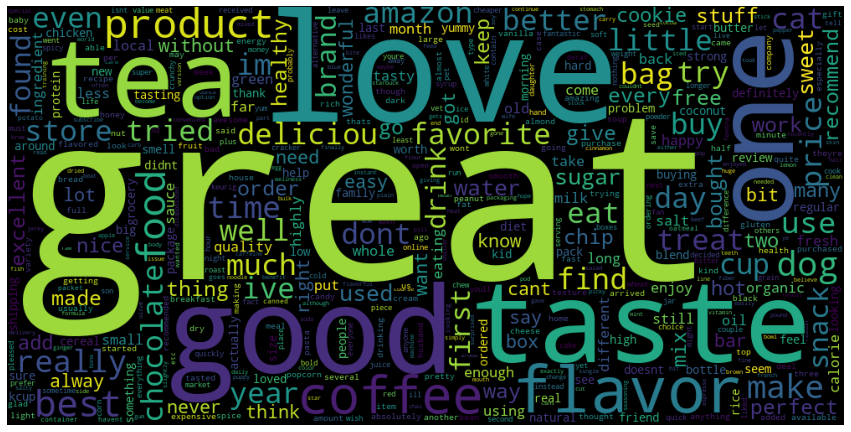

In [9]:
Fivestar = df_train[df_train['Score'] == 5]['StopWord_Removed_Text']
Fivestarw = [word for words in Fivestar for word in words.split()]

# Plotting the word cloud of 5 star reviews
plt.figure(figsize = (15,15))
wcFivestarw= WordCloud(max_words = 500 , width = 1000 , height = 500, collocations=False).generate(" ".join(Fivestarw))
plt.imshow(wcFivestarw)
plt.axis('off')

## **Word** **Cloud** **For** **1-Star** **Reviews**

(-0.5, 999.5, 499.5, -0.5)

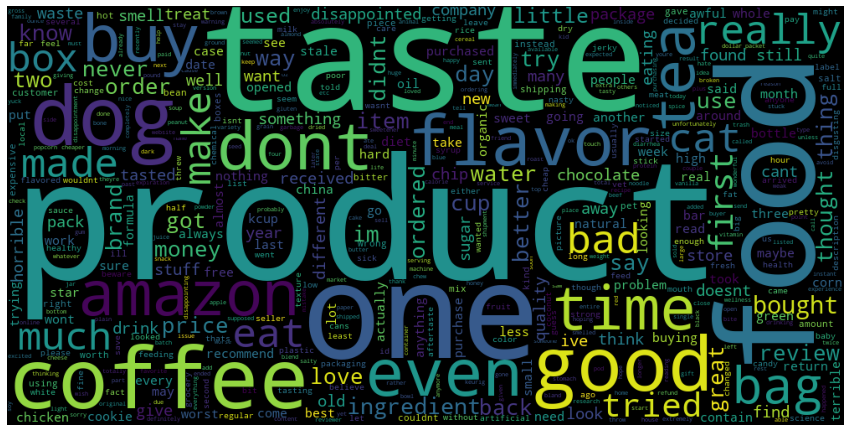

In [ ]:
Onestar = df_train[df_train['Score'] == 1]['StopWord_Removed_Text']
Onestarw = [word for words in Onestar for word in words.split()]

# Plotting the word cloud of 5 star reviews
plt.figure(figsize = (15,15))
wcOnestarw= WordCloud(max_words = 500 , width = 1000 , height = 500, collocations=False).generate(" ".join(Onestarw))
plt.imshow(wcOnestarw)
plt.axis('off')

**Five-star Reviews**: - A word cloud for 5-star reviews word list was generated in which it displays words like Good, Great, Better, Love, Best, and etc showing that the 5-star reviews mostly have positive description about the product. The different products discussed in the five star reviews are coffee, tea, food, chocolate, etc.

**One-star Reviews**: - A word cloud for 1-star reviews word list was generated in which it displays words like Don’t, Terrible, Bad, Disappointed, and etc showing that the 1-star reviews mostly have negative description about the product. The different products discussed in the one-star reviews are coffee, amazon product, dog food, etc.


## **Word Frequency**

### **Frequency of the dataset**

In [ ]:
tokens = [word for sent in df_train['StopWord_Removed_Text'] for word in sent.split()]
freqw = Counter(tokens)
freqws = sorted(freqw.items(), key=lambda pair: pair[1], reverse=True)
freqdf = pd.DataFrame(freqws[:20], columns=['word', 'counts'])
freqdf.head(10)

,word,counts
0,like,198902
1,good,184354
2,great,176038
3,taste,138268
4,coffee,137198
5,one,131877
6,product,124536
7,flavor,116523
8,love,114915
9,tea,114902


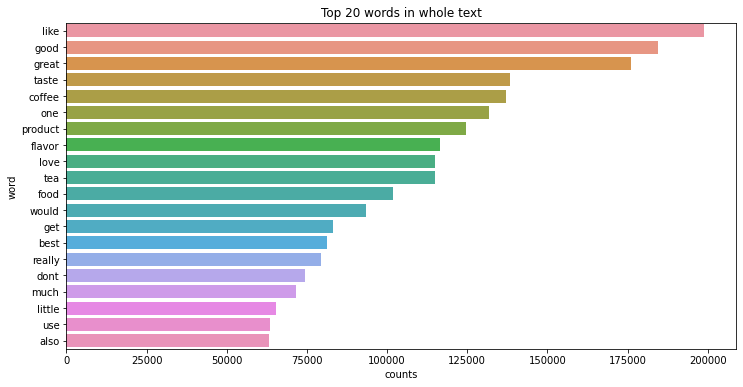

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=freqdf, x='counts', y='word')
plt.title('Top 20 words in whole text')
plt.show()

In [ ]:
# Function to get the fequency of the words in the tweets of the specified sentiment
def freqswords(text, rating, num):

  tokens = [word for sent in text[text['Score'] == rating]
            ['StopWord_Removed_Text'] for word in sent.split()]
  freqw = Counter(tokens)
  freqws = sorted(freqw.items(), key=lambda pair: pair[1], reverse=True)
  freqdf = pd.DataFrame(freqws[:num], columns=['word', 'counts'])
  return freqdf

# Function to plot the fequency of the words in the tweets of the specified sentiment
def plotfreq(data, st):
  plt.figure(figsize=(12, 6))
  sns.barplot(data=data, x='counts', y='word')
  plt.title(f'Top 20 words in {st} star rating')
  plt.show()

### **Frequency of Five Star Reviews**

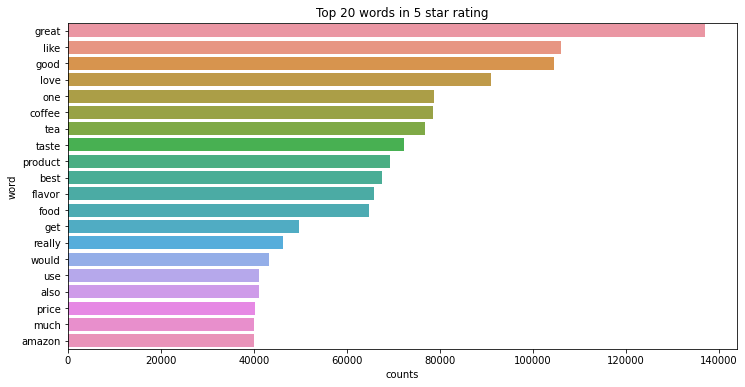

In [ ]:
Fivewords = freqswords(df_train, 5, 20)
plotfreq(Fivewords, 5)

### **Frequency of One Star Reviews**

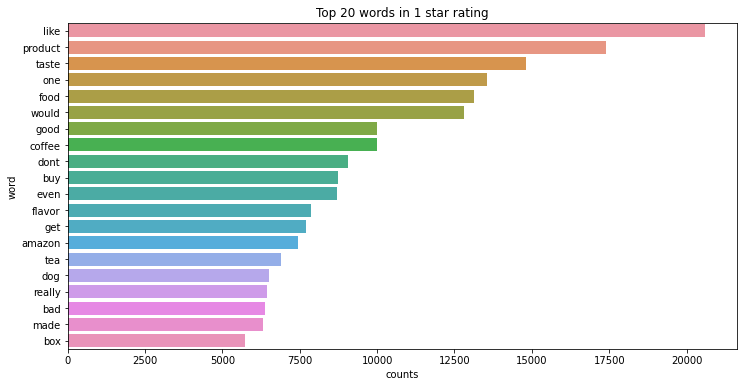

In [ ]:
Onewords = freqswords(df_train, 1, 20)
plotfreq(Onewords, 1)

**Whole Text Words Frequency**: - After tokenizing the words of the texts in the datasets, a frequency bar chart of the words was plotted where the most used word in the dataset is like, good, great, and etc showing that the dataset mostly contains positive reviews about the products.

**Five-star Reviews Word Frequency**: - Further ahead the five-star reviews were separately tokenized from the dataset and the frequency bar chart of the words was plotted and the words that were mostly used in these five-star text are great, like, good, love, etc.

**One-star Reviews Word Frequency**: - Finally, the one-star reviews were tokenized from the dataset and the frequency bar chart of the words was plotted and the words that were mostly used in these one-star text are like, product, taste, food, etc.

## **TF-IDF Vectorizer**

In [9]:
# TF-IDF Vectorizing for unigrams
vect = TfidfVectorizer(ngram_range = (1,1),sublinear_tf= True)
textList_train = np.array(df_train['Stemmed_Text'].ravel())
textList_test = np.array(df_test['Review_text'].ravel())
Xtf_train = vect.fit_transform(textList_train)
Xtf_test = vect.transform(textList_test)


Y = df_train['Score']


In [ ]:
print(Xtf_train.shape)

(226340, 168795)


In [ ]:
print(Y)

0         5
1         5
2         5
3         5
4         5
         ..
226335    5
226336    1
226337    5
226338    3
226339    5
Name: Score, Length: 226340, dtype: int64


## **Count Vectorizer**

In [10]:
# Count Vectorizing for unigrams
cntvect = CountVectorizer(stop_words='english',max_features=10000,ngram_range = (1,1))
Xcv_train = cntvect.fit_transform(textList_train)
Xcv_test = cntvect.transform(textList_test)

## **Unigrams**

### **Bernoulli** **Naive** **Bayes**

In [11]:
X_train, X_val, y_train, y_val = train_test_split(Xtf_train, Y, test_size=0.2, random_state=0)
BN = BernoulliNB()
BN.fit(X_train, y_train)
y_pred2 = BN.predict(X_val)
print(accuracy_score(y_val,y_pred2))

0.6656659004550359


In [33]:
print(classification_report(y_val,y_pred2))

              precision    recall  f1-score   support

           1       0.63      0.42      0.50      7770
           2       0.54      0.06      0.10      4495
           3       0.38      0.16      0.22      6319
           4       0.36      0.28      0.31     11998
           5       0.72      0.89      0.80     54686

    accuracy                           0.67     85268
   macro avg       0.53      0.36      0.39     85268
weighted avg       0.63      0.67      0.63     85268



In [12]:
Xcv_train, Xcv_val, ycv_train, ycv_val = train_test_split(Xcv_train, Y, test_size=0.2, random_state=0)
BNCV = BernoulliNB()
BNCV.fit(Xcv_train, ycv_train)
y_predCV = BNCV.predict(Xcv_val)
print(accuracy_score(y_val,y_predCV))

0.6653492517708871


In [ ]:
print(classification_report(y_val,y_predCV))

**TF-IDF vectorizer**: -
This vector representation is converting the strings into a numerical representation of frequency of a word in the corpus and represents how important the word is. The computation time of this vectorizer is relatively lesser than that of count vectorizer for this dataset. TF-IDF vectors provides the ability of understanding a words importance in the corpus which would give us a better advantage for our machine learning models, but even so this vector does not recognize word associations, such as linguistic similarity between terms just like count vectorizer. An initial analysis of the vectorizer was done by using it to train the Bernoulli naïve bayes model. The given accuracy of the model was 0.6656.

**Count Vectorizer**: -
This vector representation is converting the strings into frequency representation of the words. The computation time of vectorizing the text was longer than that of tf-idf vectorizer. Count Vectors have the inability to understand the importance of a word in the text and cannot recognize word associations, such as linguistic similarity between terms. An initial analysis of the vectorizer was done using Bernoulli naïve bayes. The given accuracy of the model was 0.6653. 


### **Logistic Regression**

In [ ]:
LR = LogisticRegression(solver='liblinear',random_state=0)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_val)
print(accuracy_score(y_val,y_pred))

0.7580804053103157


In [ ]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           1       0.70      0.71      0.70      7770
           2       0.59      0.20      0.30      4495
           3       0.56      0.32      0.40      6319
           4       0.54      0.28      0.37     11998
           5       0.80      0.97      0.88     54686

    accuracy                           0.76     85268
   macro avg       0.64      0.50      0.53     85268
weighted avg       0.73      0.76      0.72     85268



### **Multinomial Naive Bayes**

In [ ]:
from pandas.core.common import random_state
MN = MultinomialNB()
MN.fit(X_train, y_train)
y_pred3 = MN.predict(X_val)
print(accuracy_score(y_val,y_pred3))

0.6439813294553642


In [ ]:
print(classification_report(y_val,y_pred3))

              precision    recall  f1-score   support

           1       0.90      0.03      0.05      7770
           2       0.71      0.00      0.00      4495
           3       0.89      0.00      0.00      6319
           4       0.61      0.00      0.01     11998
           5       0.64      1.00      0.78     54686

    accuracy                           0.64     85268
   macro avg       0.75      0.21      0.17     85268
weighted avg       0.68      0.64      0.51     85268



## **Bigrams**

In [ ]:
# TF-IDF Vectorizing for bigrams
vect = TfidfVectorizer(ngram_range = (2,2),sublinear_tf= True)
Xtfbi_train = vect.fit_transform(textList_train)
Xbi_train, Xbi_val, ybi_train, ybi_val = train_test_split(Xtfbi_train, Y, test_size=0.2, random_state=0)

### **Bernoulli** **Naive** **Bayes**

In [ ]:
BNbi = BernoulliNB()
BNbi.fit(Xbi_train, ybi_train)
y_pred2 = BNbi.predict(Xbi_val)
print(accuracy_score(ybi_val,y_pred2))

0.6637660083501431


In [ ]:
print(classification_report(ybi_val,y_pred2))

              precision    recall  f1-score   support

           1       0.81      0.13      0.22      7770
           2       0.57      0.04      0.07      4495
           3       0.58      0.08      0.13      6319
           4       0.46      0.19      0.27     11998
           5       0.68      0.96      0.79     54686

    accuracy                           0.66     85268
   macro avg       0.62      0.28      0.30     85268
weighted avg       0.64      0.66      0.58     85268



### **Logistic Regression**

In [ ]:
LRbi = LogisticRegression(solver='liblinear',random_state=0)
LRbi.fit(Xbi_train, ybi_train)
y_pred = LRbi.predict(Xbi_val)
print(accuracy_score(ybi_val,y_pred))

0.7627363137402073


In [ ]:
print(classification_report(ybi_val,y_pred))

              precision    recall  f1-score   support

           1       0.82      0.55      0.66      7770
           2       0.90      0.25      0.39      4495
           3       0.83      0.29      0.43      6319
           4       0.76      0.30      0.43     11998
           5       0.75      0.99      0.86     54686

    accuracy                           0.76     85268
   macro avg       0.82      0.48      0.55     85268
weighted avg       0.78      0.76      0.72     85268



### **Multinomial Naive Bayes**

In [ ]:
MNbi = MultinomialNB()
MNbi.fit(Xbi_train, ybi_train)
y_pred3 = MNbi.predict(Xbi_val)
print(accuracy_score(y_val,y_pred3))

0.6557911526012103


In [ ]:
print(classification_report(y_val,y_pred3))

              precision    recall  f1-score   support

           1       0.99      0.08      0.14      7770
           2       1.00      0.01      0.02      4495
           3       1.00      0.02      0.04      6319
           4       0.99      0.04      0.07     11998
           5       0.65      1.00      0.79     54686

    accuracy                           0.66     85268
   macro avg       0.93      0.23      0.21     85268
weighted avg       0.77      0.66      0.53     85268



## **Trigrams**

In [ ]:
# TF-IDF Vectorizing for trigrams
vect = TfidfVectorizer(ngram_range = (3,3),sublinear_tf= True)
Xtftri_train = vect.fit_transform(textList_train)
Xtri_train, Xtri_val, ytri_train, ytri_val = train_test_split(Xtftri_train, Y, test_size=0.2, random_state=0)

### **Bernoulli** **Naive** **Bayes**

In [ ]:
BNtri = BernoulliNB()
BNtri.fit(Xtri_train, ytri_train)
y_pred2 = BNtri.predict(Xtri_val)
print(accuracy_score(y_val,y_pred2))

0.6517568138105737


In [ ]:
print(classification_report(y_val,y_pred2))

              precision    recall  f1-score   support

           1       0.82      0.05      0.09      7770
           2       0.73      0.01      0.02      4495
           3       0.69      0.02      0.05      6319
           4       0.47      0.11      0.18     11998
           5       0.66      0.98      0.79     54686

    accuracy                           0.65     85268
   macro avg       0.67      0.23      0.22     85268
weighted avg       0.65      0.65      0.54     85268



### **Logistic Regression**

In [ ]:
LRtri = LogisticRegression(solver='liblinear',random_state=0)
LRtri.fit(Xtri_train, ytri_train)
y_pred = LRtri.predict(Xtri_val)
print(accuracy_score(y_val,y_pred))

0.7068654125815077


In [ ]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           1       0.99      0.21      0.35      7770
           2       1.00      0.14      0.25      4495
           3       0.99      0.16      0.28      6319
           4       0.99      0.19      0.32     11998
           5       0.69      1.00      0.81     54686

    accuracy                           0.71     85268
   macro avg       0.93      0.34      0.40     85268
weighted avg       0.80      0.71      0.63     85268



### **Multinomial Naive Bayes**

In [ ]:
MNtri = MultinomialNB()
MNtri.fit(Xtri_train, ytri_train)
y_pred3 = MNtri.predict(Xtri_val)
print(accuracy_score(y_val,y_pred3))

0.7142656096073556


In [ ]:
print(classification_report(y_val,y_pred3))

              precision    recall  f1-score   support

           1       1.00      0.23      0.38      7770
           2       1.00      0.15      0.26      4495
           3       1.00      0.18      0.30      6319
           4       0.99      0.22      0.36     11998
           5       0.69      1.00      0.82     54686

    accuracy                           0.71     85268
   macro avg       0.93      0.36      0.42     85268
weighted avg       0.80      0.71      0.65     85268



In [ ]:
y_pred3

array([5, 5, 5, ..., 5, 5, 5])

Including the n-grams feature, a TD-IF vectorized text was generated for unigrams, bigrams, and trigrams in which as the number of n-grams increases the computation time of vectorizing the n-gram featured texts increase. An initial analysis was done using the n-grams on some of the classifiers.

**Unigram**: -

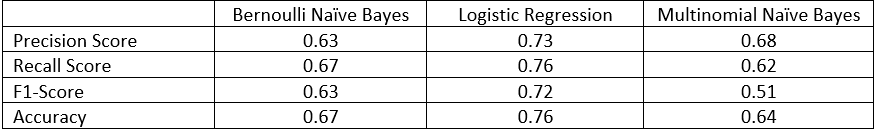

**Bigram**: -

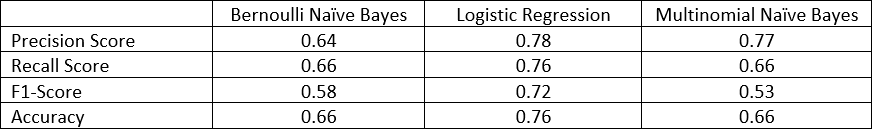

**Trigram**: -

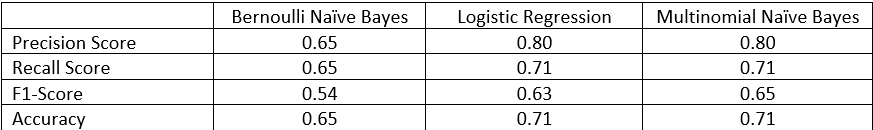


From the following score we can see that the scores of unigrams and bigrams didn’t have much of a difference and having their accuracies of the 3 models nearly the same. Whereas, for trigrams we can see that for Bernoulli and Logistic regression, the accuracies decrease from that of unigram and bigram but for Multinomial the accuracy of trigram is higher than that of unigrams. Also, the computation time of training these models increased as the number of n-grams increased.

## **Hyperparameter Tuning for Bernoulli Naive Bayes**

In [ ]:
parameters = {  'alpha':[0, 1],
                'fit_prior':(True, False),
             }

In [ ]:
#Grid Search Hyper Parameter Tuning for Bernoulli
gscBN = GridSearchCV(estimator = BernoulliNB(), param_grid= parameters,cv= 5,verbose =1)

In [ ]:
gscBN.fit(X_train, y_train)

In [ ]:
print(f'Best hyperparameters: {gscBN.best_params_}') 

Best hyperparameters: {'alpha': 0, 'fit_prior': True}


In [ ]:
print(f'Best score: {gscBN.best_score_}')

Best score: 0.6874005966694325


In [21]:
BN = BernoulliNB(alpha = 0, fit_prior = True)
BN.fit(X_train, y_train)
y_pred2 = BN.predict(X_val)
print(classification_report(y_val,y_pred2))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


              precision    recall  f1-score   support

           1       0.64      0.57      0.60      7770
           2       0.42      0.34      0.38      4495
           3       0.44      0.32      0.37      6319
           4       0.43      0.34      0.38     11998
           5       0.79      0.88      0.84     54686

    accuracy                           0.71     85268
   macro avg       0.55      0.49      0.51     85268
weighted avg       0.68      0.71      0.69     85268



## **Hyperparameter Tuning for  Logistic Regression**

In [ ]:
parametersLR = {  'multi_class':('auto', 'ovr','multinomial'),
                'penalty':('l1', 'l2','elasticnet'),
                'solver' : ('liblinear', 'sag','newton-cg')
 
            }
        
#Grid Search Hyper Parameter Tuning for Logistic Regression
gscLR = GridSearchCV(estimator = LogisticRegression(), param_grid= parametersLR,cv= 5,verbose =1)

In [ ]:
gscLR.fit(Xtf_train, Y)

In [ ]:
print(f'Best hyperparameters: {gscLR.best_params_}') 


Best hyperparameters: {'multi_class': 'auto', 'penalty': 'l2', 'solver': 'sag'}


In [ ]:
print(f'Best score: {gscLR.best_score_}')

Best score: 0.7526232571150122


In [22]:
LRT = LogisticRegression(multi_class = 'auto', penalty = 'l2',solver = 'sag')
LRT.fit(X_train, y_train)

LogisticRegression(solver='sag')

In [23]:
y_pred = LRT.predict(X_val)

In [24]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           1       0.70      0.74      0.72      7770
           2       0.55      0.28      0.38      4495
           3       0.55      0.37      0.44      6319
           4       0.57      0.31      0.40     11998
           5       0.82      0.96      0.88     54686

    accuracy                           0.77     85268
   macro avg       0.64      0.53      0.56     85268
weighted avg       0.74      0.77      0.74     85268



## **Hyperparameter Tuning for Multinomial Naive Bayes**

In [ ]:
parameters = {  'alpha':[0, 1],
                'fit_prior':(True, False),
             }

#Grid Search Hyper Parameter Tuning for Multinomial
gscMN = GridSearchCV(estimator = MultinomialNB(), param_grid= parameters,cv= 5,verbose =1)

In [ ]:
gscMN.fit(X_train, y_train)

In [ ]:
print(f'Best hyperparameters: {gscMN.best_params_}') 

Best hyperparameters: {'alpha': 0, 'fit_prior': True}


In [ ]:
print(f'Best score: {gscMN.best_score_}')

Best score: 0.6962258080791635


In [25]:
MN = MultinomialNB(alpha = 0, fit_prior = True)
MN.fit(X_train, y_train)
y_pred3 = MN.predict(X_val)
print(classification_report(y_val,y_pred3))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


              precision    recall  f1-score   support

           1       0.72      0.47      0.57      7770
           2       0.59      0.20      0.30      4495
           3       0.58      0.21      0.31      6319
           4       0.56      0.22      0.32     11998
           5       0.73      0.96      0.83     54686

    accuracy                           0.72     85268
   macro avg       0.64      0.41      0.47     85268
weighted avg       0.69      0.72      0.67     85268



In [ ]:
LRop = LogisticRegression(multi_class = 'auto', penalty = 'l2', solver = 'sag')
LRop.fit(X_train, y_train)

In [ ]:
y_pred = LRop.predict(Xtf_test)

In [ ]:
id = np.array(range(1,142115))

In [ ]:
y_pred

subdf = pd.DataFrame({'id': id, 'Score': y_pred}, columns=['id', 'Score'])
subdf

In [ ]:
subdf.to_csv (r'submission.csv', index = False, header=True)

**Bernoulli Naïve Bayes**
After executing the hyper parameter tuning, the optimal parameters for this classification model were: - ‘alpha’: 0, ‘fit_prior’: True, which the best score given was 0.687. Using these optimized parameters, the model was trained using the training dataset and the scores and the accuracies given by the prediction of the model were as follows: -

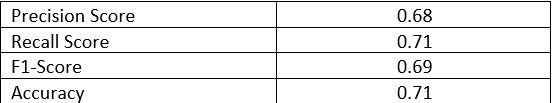


**Logistic Regression** 
After executing the hyper parameter tuning, the optimal parameters for this classification model were: - ‘multi_class’: ‘auto’, ‘penalty’: ‘l2', 'solver': 'sag, which the best score given was 0.752. Using these optimized parameters, the model was trained using the training dataset and the scores and the accuracies given by the prediction of the model were as follows: -

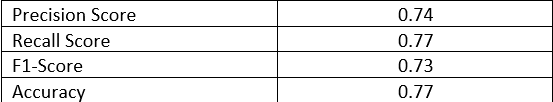


**Multinomial Naïve Bayes**
After executing the hyper parameter tuning, the optimal parameters for this classification model were: - 'alpha': 0, 'fit_prior': True, which the best score given was 0.696. Using these optimized parameters, the model was trained using the training dataset and the scores and the accuracies given by the prediction of the model were as follows: -

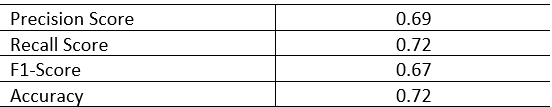


## **LSTM Model**

In [196]:
#Encoding sentiment based on scores
def get_sent(score):
  if score == 5 or score == 4 or score == 3:
    return 1
  else:
    return 0

In [197]:
df_train['Sentiment'] = df_train['Score'].apply(get_sent)

In [198]:
df_train

,Score,Review_text,Clean_Text,StopWord_Removed_Text,Lemmatized_Text,Stemmed_Text,Sentiment
0,5,I received this product early from the seller!...,i received this product early from the seller ...,received product early seller tastey great mid...,receive product early seller tastey great midd...,receiv product earli seller tastey great midda...,1
1,5,*****<br />Numi's Collection Assortment Melang...,numis collection assortment melange includes5 ...,numis collection assortment melange includes5 ...,numis collection assortment melange includes5 ...,numi collect assort melang includes5 herbal te...,1
2,5,"I was very careful not to overcook this pasta,...",i was very careful not to overcook this pasta ...,careful overcook pasta making sure take bite e...,careful overcook pasta make sure take bite eve...,care overcook pasta make sure take bite everi ...,1
3,5,Buying this multi-pack I was misled by the pic...,buying this multipack i was misled by the pict...,buying multipack misled picture whole hazel nu...,buy multipack mislead picture whole hazel nut ...,buy multipack mislead pictur whole hazel nut a...,1
4,5,These bars are so good! I loved them warmed up...,these bars are so good i loved them warmed up ...,bars good loved warmed definitely think great ...,bar good love warm definitely think great snac...,bar good love warm definit think great snack b...,1
...,...,...,...,...,...,...,...
426335,5,"I had been buying at a store, but they had a h...",i had been buying at a store but they had a ha...,buying store hard time keeping stockmy dogs al...,buy store hard time keep stockmy dog already h...,buy store hard time keep stockmi dog alreadi h...,1
426336,5,So glad that there are companies that are maki...,so glad that there are companies that are maki...,glad companies making products without gmo mag...,glad company make products without gmo magnesi...,glad compani make product without gmo magnesiu...,1
426337,4,"I love real Scottish haggis and this brand, th...",i love real scottish haggis and this brand tho...,love real scottish haggis brand though america...,love real scottish haggis brand though america...,love real scottish haggi brand though american...,1
426338,5,We eat a lot of syrup in our house. My three ...,we eat a lot of syrup in our house my three y...,eat lot syrup house three year olds favorite f...,eat lot syrup house three year olds favorite f...,eat lot syrup hous three year old favorit food...,1


In [235]:
max_words = 10000
max_len = 100

In [236]:
tokens = Tokenizer(num_words=max_words)
tokens.fit_on_texts(df_train['Stemmed_Text'][:80000])
list_tokens = tokens.texts_to_sequences(df_train['Stemmed_Text'][:80000])

X_train = pad_sequences(list_tokens, maxlen=max_len)

In [242]:
# Creatin the LSTM Model Structure
embedding__length = 50
model = Sequential()
model.add(Embedding(max_words,embedding__length,input_length = max_len))
model.add(Dropout(0.4))
model.add(LSTM(128,return_sequences=True, dropout = 0.2,recurrent_dropout=0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')


Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_57 (Embedding)    (None, 100, 50)           500000    
                                                                 
 dropout_98 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_92 (LSTM)              (None, 100, 128)          91648     
                                                                 
 dense_78 (Dense)            (None, 100, 512)          66048     
                                                                 
 dropout_99 (Dropout)        (None, 100, 512)          0         
                                                                 
 dense_79 (Dense)            (None, 100, 1)            513       
                                                                 
Total params: 658,209
Trainable params: 658,209
Non-t

In [238]:
Xls_train, Xls_val, yls_train, yls_val = train_test_split(X_train, df_train['Sentiment'][:80000], test_size=0.2, random_state=0)

In [244]:
hist = model.fit(Xls_train,yls_train,batch_size=64,epochs=5,validation_split=0.2)

Epoch 1/5
800/800 [==============================] - 305s 380ms/step - loss: 0.3649 - accuracy: 0.8688 - val_loss: 0.3763 - val_accuracy: 0.8624
Epoch 2/5
800/800 [==============================] - 324s 405ms/step - loss: 0.3538 - accuracy: 0.8732 - val_loss: 0.3803 - val_accuracy: 0.8606
Epoch 3/5
800/800 [==============================] - 303s 379ms/step - loss: 0.3468 - accuracy: 0.8761 - val_loss: 0.3806 - val_accuracy: 0.8632
Epoch 4/5
800/800 [==============================] - 328s 411ms/step - loss: 0.3420 - accuracy: 0.8778 - val_loss: 0.3920 - val_accuracy: 0.8632
Epoch 5/5
800/800 [==============================] - 300s 375ms/step - loss: 0.3381 - accuracy: 0.8794 - val_loss: 0.3890 - val_accuracy: 0.8635


In [246]:
hist.history

{'accuracy': [0.8687671422958374,
  0.8731703758239746,
  0.8760532140731812,
  0.877763032913208,
  0.8793758153915405],
 'loss': [0.3649328351020813,
  0.35383594036102295,
  0.346771776676178,
  0.34196895360946655,
  0.3380667567253113],
 'val_accuracy': [0.8623671531677246,
  0.8605706691741943,
  0.8631817102432251,
  0.8631757497787476,
  0.8634771704673767],
 'val_loss': [0.3763049840927124,
  0.3803160786628723,
  0.3805897831916809,
  0.39201927185058594,
  0.38898906111717224]}

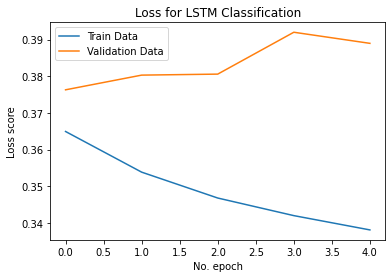

In [248]:
plt.plot(hist.history['loss'],label='Train Data')
plt.plot(hist.history['val_loss'],label='Validation Data')
plt.title("Loss for LSTM Classification")
plt.xlabel('No. epoch')
plt.ylabel('Loss score')
plt.legend(loc= 'upper left')
plt.show()

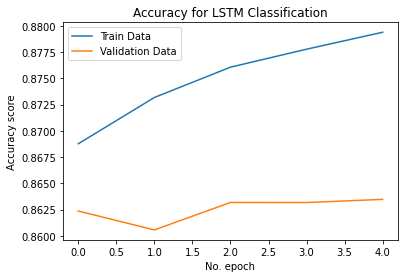

In [249]:
plt.plot(hist.history['accuracy'],label='Train Data')
plt.plot(hist.history['val_accuracy'],label='Validation Data')
plt.title("Accuracy for LSTM Classification")
plt.xlabel('No. epoch')
plt.ylabel('Accuracy score')
plt.legend(loc= 'upper left')
plt.show()

Modelling text as a sequence was done using an LSTM model. For this we first made the target scores into binary values where all the reviews which are of rating 5, 4 or 3 was assigned as 1 (Positive Review) and rating 2 or 1 was assigned as 0 (Negative Review). In the dataset, a new column was created called Sentiment which had these target values, and this was taken for training our LSTM model. 

We then tokenize the texts in the dataset and make the text into a numeric sequence with the vocabulary size to be an arbitrary value of 10,000 and padding of the sequence of texts was done with the maximum length to be an arbitrary value of 100 so that the sequence will have the same shape. This sequence will be further used for training. After we created our text sequence, the Sequential model for LSTM was created. The structure is as follows: -

**Embedding layer**: - This layer computes an embedding vector of fixed length for each of the input sequence and this helps in the vector representation of large text datasets. For this model the embedding length was set to an arbitrary value of 50.

**Dropout layer**: - This layer is a simple method of preventing overfitting for this LSTM neural network. A dropout value of 0.4 was set for this model.

**LSTM layer**: - This is a type of RNN neural network architecture that has a memory state cell that learns the contexts of words that further along holds the contextual meaning of the word. LSTM classifies the sequence data that has been computed in the previous steps and make predictions based on the time steps of the individual data in the sequence data. The LSTM layer was set with the number of units for the dimension of the output to be set a value of 128.

**Dense layer**: - This layer is the deeply connected neural network layer of the model. Two dense layer was created where one applies the ReLU (Rectified Linear Unit) activation function and the final layer which is the output layer which applies the Sigmoid function.

The accuracy of the LSTM classification had a decrease in the first epoch to around 0.860 but after the second epoch it gradually increased and became nearly constant to the final accuracy of 0.8635.

Comparing the Bag of Word and Text as a sequence model, Text as a sequence have the feature of word embedding unlike the models in bag of words which helps in learning and understanding the words better in a sentence than that in bag of words where it does not train to understand the context of the words. The accuracy of the model was higher for LSTM Model



## **Topic Modelling with LDA and PyLDAVis**

### **Five Star Reviews Topic Modelling**

In [ ]:
Fivestar

0         received product early seller tastey great mid...
1         numis collection assortment melange includes5 ...
2         careful overcook pasta making sure take bite e...
3         buying multipack misled picture whole hazel nu...
4         bars good loved warmed definitely think great ...
                                ...                        
426334    treats excellent training dogs love safe peanu...
426335    buying store hard time keeping stockmy dogs al...
426336    glad companies making products without gmo mag...
426338    eat lot syrup house three year olds favorite f...
426339    buy give dog needs lose weight gets hungry cut...
Name: StopWord_Removed_Text, Length: 272124, dtype: object

In [ ]:
# Vectorizing the tweets with Count Vectorizer for the LDA model
cntvectorizer = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True)
Fivestart_vectorized = cntvectorizer.fit_transform(Fivestar[:112124])

In [ ]:
# LDA Model for the dataset
Fivelda = LatentDirichletAllocation(n_components=15, max_iter=10, learning_method='online',verbose=True)
Fivet_lda = Fivelda.fit_transform(Fivestart_vectorized)

In [ ]:
pyLDAvis.enable_notebook()
UI = pyLDAvis.sklearn.prepare(Fivelda, Fivestart_vectorized, cntvectorizer, mds='tsne')
UI

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distan

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      114.344879  114.308296       1        1  13.178906
6      105.821045  -93.749626       2        1  10.634003
14    -138.334473   95.320763       3        1   9.746759
10      -7.436697  111.259697       4        1   9.431863
2     -207.550629 -105.472603       5        1   8.667137
13      52.817650   14.603765       6        1   7.058011
11     168.010849    6.806950       7        1   5.453230
0      -94.169601 -157.789551       8        1   5.428192
7     -122.849174  -39.059418       9        1   5.353192
3      -94.894264  195.408295      10        1   4.893727
12      24.927401 -180.464874      11        1   4.708723
4      -53.413467   26.832108      12        1   4.645894
5      -12.255850  -72.093201      13        1   3.834074
8     -224.217957   28.070581      14        1   3.819902
9       36.154255  209.427582      15        1   3.146385, topic_info=          Term          Freq         Total Category  logprob  loglift
34750      tea  78035.000000  78035.000000  Default  30.0000  30.0000
7991    coffee  77743.000000  77743.000000  Default  29.0000  29.0000
14328     food  64412.000000  64412.000000  Default  28.0000  28.0000
2713    amazon  39450.000000  39450.000000  Default  27.0000  27.0000
11256      dog  36179.000000  36179.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
37383     used   2876.416557  24578.919374  Topic15  -4.6391   1.3136
33051  started   2031.691967   7988.590505  Topic15  -4.9868   2.0898
13545     feel   2153.841489  10994.900640  Topic15  -4.9284   1.8287
9878       day   1824.220977  24205.378798  Topic15  -5.0945   0.8735
27540  product   1877.906272  68765.274501  Topic15  -5.0655  -0.1416

[850 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
474        2  0.999316         18
993       12  0.998828         35
1795       8  0.999311  according
1920       1  0.040428        add
1920       6  0.029548        add
...      ...       ...        ...
39454      8  0.999504     yogurt
39511      1  0.909322      youll
39511     11  0.090547      youll
39604      2  0.292083      yummy
39604      5  0.707813      yummy

[1520 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 7, 15, 11, 3, 14, 12, 1, 8, 4, 13, 5, 6, 9, 10])

**Five Star Reviews Topic Modelling**

The texts of the five-star reviews were extracted and was converted into vectorized form using the count-vectorizer for topic modelling. The vectorized text was then passed into the LDA model with the number topics to be split into 15 components with the maximum iteration of 10. After the process of LDA, we used the PyLDAVis to visualise the topics that were generated by LDA. After visualizing the topics some of the relevant topics that are being discussed in the five-star reviews are as follows: - 

•	Topic 3 contains words like amazon, shipping, price, store, product etc. This would show that this topic discusses about the shipment of the products and the prices and details about the product in general.

•	Topic 4 contains words like dog, treats, food, cats, vet dry, etc. From the following observations we can say that this topic discusses about pet food in general and their reviews.

•	Topic 6 contains words like coffee, cup, beans, bitter, dark, etc. In this topic, the words are categorised of reviews that mention about coffee bean products.

•	Topic 10 contains words like product, health, organic, vitamins, diet, bottles, etc. This topic mentions about reviews that discuss of health and medicine products.

•	Topic 14 contains words like tea, green, black, ginger, lemon, etc. This topic mainly focuses on the reviews that discuss about the different tea flavours products that are being sold.


### **One Star Reviews Topic Modelling**

In [ ]:
cntvectorizer = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True)
Onestart_vectorized = cntvectorizer.fit_transform(Onestar)

In [ ]:
# LDA Model for the dataset
Onelda = LatentDirichletAllocation(n_components=15, max_iter=10, learning_method='online',verbose=True)
Onet_lda = Onelda.fit_transform(Onestart_vectorized)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [ ]:
pyLDAvis.enable_notebook()
OneUI = pyLDAvis.sklearn.prepare(Onelda, Onestart_vectorized, cntvectorizer, mds='tsne')
OneUI

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distan

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
10     114.344879  114.308296       1        1  14.496308
12     105.821045  -93.749626       2        1  11.448741
4     -138.334473   95.320763       3        1   9.438327
6       -7.436697  111.259697       4        1   8.228406
2     -207.550629 -105.472603       5        1   7.977504
0       52.817650   14.603765       6        1   6.978415
1      168.010849    6.806950       7        1   5.690369
7      -94.169601 -157.789551       8        1   5.578990
5     -122.849174  -39.059418       9        1   5.535504
3      -94.894264  195.408295      10        1   5.261633
14      24.927401 -180.464874      11        1   4.767857
8      -53.413467   26.832108      12        1   4.660536
9      -12.255850  -72.093201      13        1   4.106876
11    -224.217957   28.070581      14        1   3.394207
13      36.154255  209.427582      15        1   2.436328, topic_info=          Term          Freq         Total Category  logprob  loglift
5325      food  13174.000000  13174.000000  Default  30.0000  30.0000
2832    coffee   9980.000000   9980.000000  Default  29.0000  29.0000
12721      tea   6920.000000   6920.000000  Default  28.0000  28.0000
12676    taste  14535.000000  14535.000000  Default  27.0000  27.0000
4180       dog   6415.000000   6415.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
7188      kids    203.604340    692.419355  Topic15  -5.2135   2.4907
8523   natural    201.574478   1989.606380  Topic15  -5.2236   1.4251
5216   flavors    199.690264   1948.384849  Topic15  -5.2329   1.4367
9193      pack    197.186340   2153.134940  Topic15  -5.2456   1.3241
9322      past    174.413184   1028.876692  Topic15  -5.3683   1.9399

[890 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
71         2  0.763759     12
71         5  0.044516     12
71         9  0.140542     12
71        14  0.050239     12
138        4  0.989682     17
...      ...       ...    ...
14324     14  0.996114  yeast
14363      5  0.703280  youre
14363      8  0.295824  youre
14375      3  0.993996  yucky
14389      9  0.997275   zico

[1752 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 13, 5, 7, 3, 1, 2, 8, 6, 4, 15, 9, 10, 12, 14])

**Five Star Reviews Topic Modelling**

The texts of the five-star reviews were extracted and was converted into vectorized form using the count-vectorizer for topic modelling. The vectorized text was then passed into the LDA model with the number topics to be split into 15 components with the maximum iteration of 10. After the process of LDA, we used the PyLDAVis to visualise the topics that were generated by LDA. After visualizing the topics some of the relevant topics that are being discussed in the five-star reviews are as follows: - 

•	Topic 3 contains words like amazon, shipping, price, store, product etc. This would show that this topic discusses about the shipment of the products and the prices and details about the product in general.

•	Topic 4 contains words like dog, treats, food, cats, vet dry, etc. From the following observations we can say that this topic discusses about pet food in general and their reviews.

•	Topic 6 contains words like coffee, cup, beans, bitter, dark, etc. In this topic, the words are categorised of reviews that mention about coffee bean products.

•	Topic 10 contains words like product, health, organic, vitamins, diet, bottles, etc. This topic mentions about reviews that discuss of health and medicine products.

•	Topic 14 contains words like tea, green, black, ginger, lemon, etc. This topic mainly focuses on the reviews that discuss about the different tea flavours products that are being sold.
